# Explore here

In [3]:
# Your code here

#from google.colab import drive
import warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv').iloc[:,2:]
print(df)

        0-9  0-9 y/o % of total pop  19-Oct  10-19 y/o % of total pop  20-29  \
0      6787               12.206615    7637                 13.735364   6878   
1     24757               11.355276   26913                 12.344167  23579   
2      2732               10.980266    2960                 11.896628   3268   
3      2456               10.964286    2596                 11.589286   3029   
4      7095               12.266598    7570                 13.087828   6742   
...     ...                     ...     ...                       ...    ...   
3135   6104               14.178532    6326                 14.694200   5359   
3136   2384               10.328842    2185                  9.466661   2967   
3137   3121               15.375142    3205                 15.788955   2153   
3138    858               10.881420    1113                 14.115409    715   
3139    780               11.195637     779                 11.181283    681   

      20-29 y/o % of total pop  30-39  

In [5]:
df.shape

(3140, 106)

In [6]:
df.head()

,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,3038,13.562500,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,7474,12.921853,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [7]:
print(df.columns.tolist())

['0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less than a high schoo

In [8]:
df = df.drop_duplicates().reset_index(drop = True)
df.head()

,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,3038,13.562500,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,7474,12.921853,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [9]:
df.dtypes

0-9                           int64
0-9 y/o % of total pop      float64
19-Oct                        int64
10-19 y/o % of total pop    float64
20-29                         int64
                             ...   
CKD_prevalence              float64
CKD_Lower 95% CI            float64
CKD_Upper 95% CI            float64
CKD_number                    int64
Urban_rural_code              int64
Length: 106, dtype: object

In [10]:
non_numerical_cols = df.select_dtypes(exclude=['number'])

# Print the types of non-numerical columns
print(non_numerical_cols.dtypes)


COUNTY_NAME    object
STATE_NAME     object
dtype: object


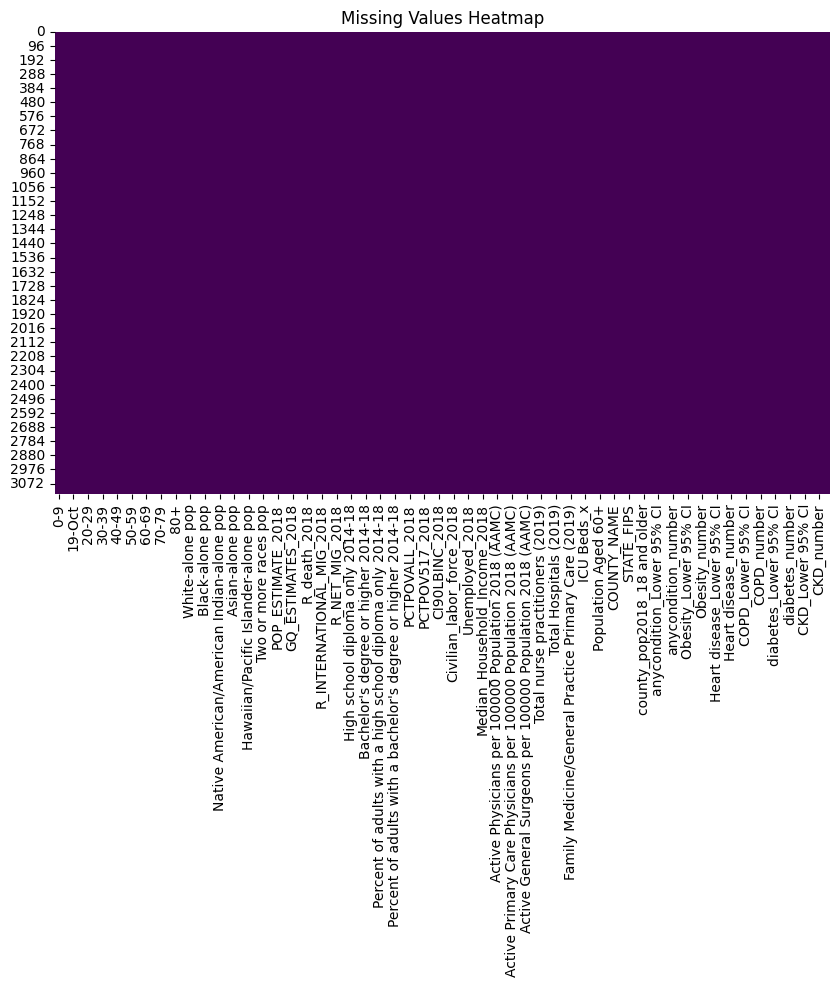

In [11]:
missing_values = df.isnull().sum()
data_types = df.dtypes

# Summary statistics
summary_stats = df.describe()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

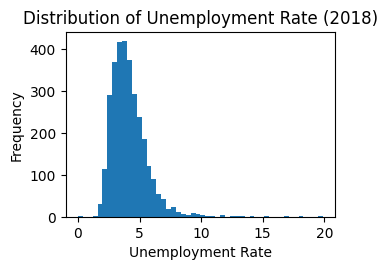

In [12]:
plt.subplot(2, 2, 4)
plt.hist(df['Unemployment_rate_2018'], bins=50)
plt.title('Distribution of Unemployment Rate (2018)')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Percentage')

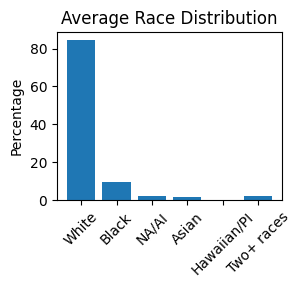

In [13]:
plt.subplot(2, 2, 2)
race_cols = ['% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races']
race_means = df[race_cols].mean()
plt.bar(range(len(race_means)), race_means)
plt.title('Average Race Distribution')
plt.xticks(range(len(race_means)), ['White', 'Black', 'NA/AI', 'Asian', 'Hawaiian/PI', 'Two+ races'], rotation=45)
plt.ylabel('Percentage')

In [14]:
df.drop(['% Two or more races','% NA/AI-alone','% Hawaiian/PI-alone'],axis=1,inplace=True)

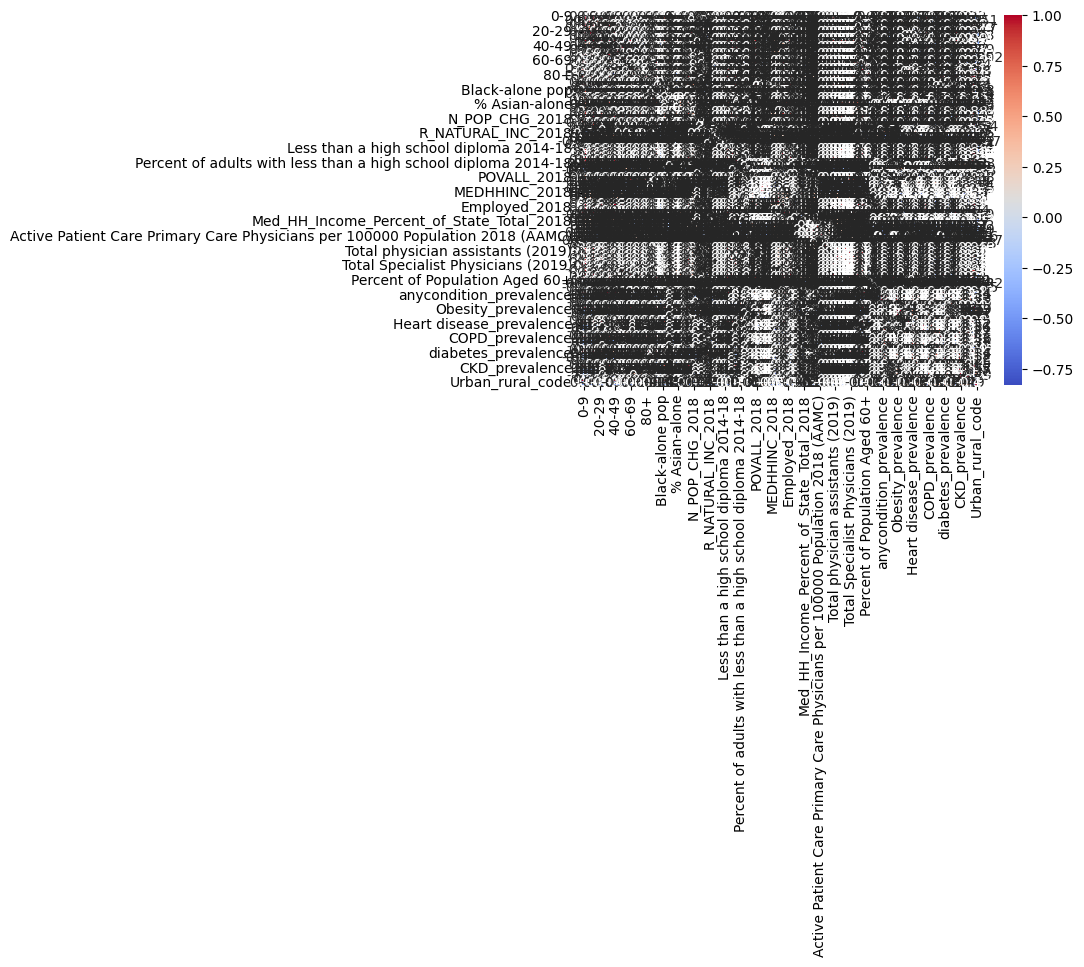

In [15]:
numeric_data = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [16]:
df = df.apply(pd.to_numeric, errors='coerce')

# Print the DataFrame
print(df)


        0-9  0-9 y/o % of total pop  19-Oct  10-19 y/o % of total pop  20-29  \
0      6787               12.206615    7637                 13.735364   6878   
1     24757               11.355276   26913                 12.344167  23579   
2      2732               10.980266    2960                 11.896628   3268   
3      2456               10.964286    2596                 11.589286   3029   
4      7095               12.266598    7570                 13.087828   6742   
...     ...                     ...     ...                       ...    ...   
3135   6104               14.178532    6326                 14.694200   5359   
3136   2384               10.328842    2185                  9.466661   2967   
3137   3121               15.375142    3205                 15.788955   2153   
3138    858               10.881420    1113                 14.115409    715   
3139    780               11.195637     779                 11.181283    681   

      20-29 y/o % of total pop  30-39  

In [17]:
correlations = df.corr()['Heart disease_number']

# Sort by correlation value to find the best
best_correlation = correlations.abs().sort_values(ascending=False)

# Print the results
print(best_correlation)
print(df.shape)

Heart disease_number                                         1.000000
COPD_number                                                  0.997023
CKD_number                                                   0.995200
anycondition_number                                          0.993327
60-69                                                        0.991934
                                                               ...   
Active General Surgeons per 100000 Population 2018 (AAMC)    0.016161
R_DOMESTIC_MIG_2018                                          0.014839
10-19 y/o % of total pop                                     0.002344
COUNTY_NAME                                                       NaN
STATE_NAME                                                        NaN
Name: Heart disease_number, Length: 103, dtype: float64
(3140, 103)


In [18]:
df = df.fillna(0)

# Print the DataFrame to check the result
print(df.shape)

(3140, 103)


In [19]:
X = df.drop(columns='Heart disease_number', axis=1)
y = df['Heart disease_number']

# Formamos los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

m_lineal = LinearRegression().fit(X_train_scaled, y_train)
yhat_train = m_lineal.predict(X_train_scaled)
yhat_test = m_lineal.predict(X_test_scaled)

In [22]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [23]:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,Median AE,MAPE
Train set,0.999567,84.237306,16.282269
Test set,0.996261,85.280635,16.814170
Diferencia,-0.003307,1.043329,0.531901


In [24]:
m_lineal.coef_.shape

(102,)

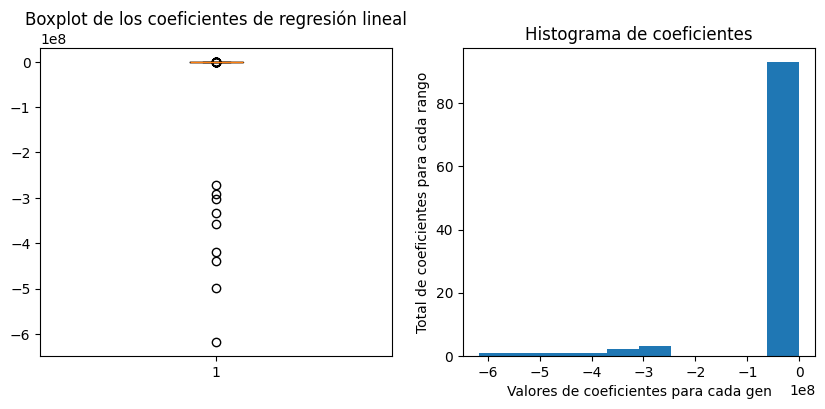

In [25]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lineal.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lineal.coef_,10)
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes')
plt.show()

In [26]:
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 10), cv=5, random_state=42, n_jobs=-1).fit(X_train_scaled, y_train)
yhat_train_lasso = m_lasso.predict(X_train_scaled)
yhat_lasso = m_lasso.predict(X_test_scaled)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88595313.62613052, tolerance: 39632490.7908205
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69195657.02474365, tolerance: 37021188.924556084
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89512395.31679358, tolerance: 39632490.7908205
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordi

In [27]:
np.logspace(-6, 6, 10)

array([1.00000000e-06, 2.15443469e-05, 4.64158883e-04, 1.00000000e-02,
       2.15443469e-01, 4.64158883e+00, 1.00000000e+02, 2.15443469e+03,
       4.64158883e+04, 1.00000000e+06])

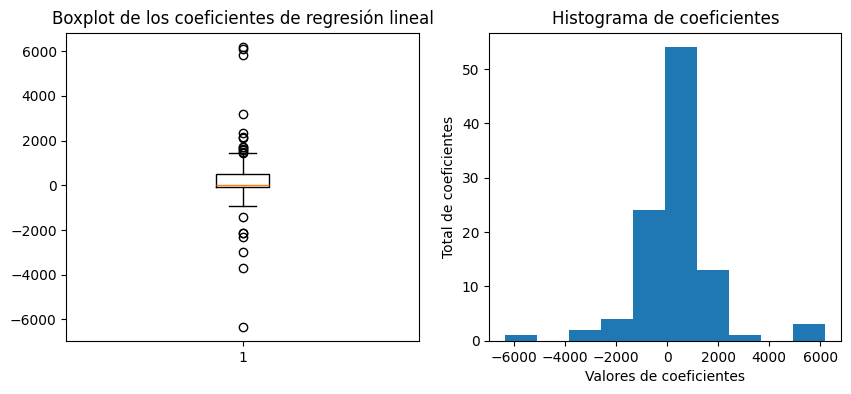

In [28]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,10)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes')
plt.title('Histograma de coeficientes')
plt.show()

In [29]:
m_lasso.coef_

array([-2.73223520e+02,  1.44906171e+03, -4.01212846e+02,  1.22840228e+03,
        2.11528475e+03,  2.16166779e+03,  3.97883288e+02,  1.14303958e+03,
        6.19895495e+03,  8.84468133e+02,  3.17376360e+03,  9.58750784e+02,
       -8.22643258e+02,  1.70244866e+03,  6.20343258e+02,  1.47983045e+03,
        1.58690263e+03,  9.26691196e+02, -6.33231952e+03,  6.00744350e+01,
       -2.12147070e+03,  2.05935747e+02, -8.81550687e+01, -1.40579715e+03,
        4.74379528e+01,  3.96570868e+01, -4.12949836e+02,  2.33813186e+03,
        1.77567975e+02, -3.37027870e+01,  7.06115727e+01, -7.80154773e+01,
       -1.22051244e+02,  5.11027985e+01,  2.50245585e+01, -3.64601301e+01,
        1.39046242e+03,  6.66998914e+02,  1.74072244e+02,  7.26851055e+02,
       -2.84395684e+01, -3.79396691e+01,  1.36570001e+01, -4.10989479e+01,
        1.71922352e+03, -1.10865132e+02,  2.17574297e+01, -1.45705245e+01,
       -4.23123158e+02,  7.26992093e+01, -1.40604917e+02, -9.27156406e+02,
        1.88126349e+01, -

In [30]:
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 1.96%
El modelo utiliza 100 variables.


In [31]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.999307,102.346836,21.943747
Test set,0.993407,106.609934,19.716438
Diferencia,-0.005900,4.263098,-2.227309


In [32]:
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 10), cv=5).fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_scaled)
yhat_ridge = m_ridge.predict(X_test_scaled)

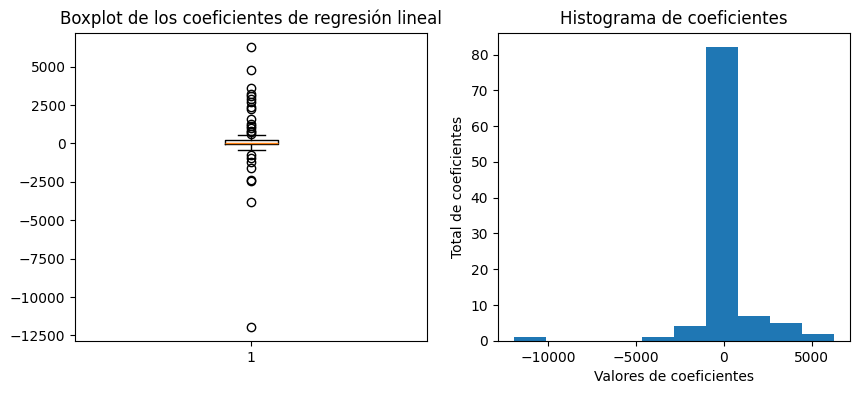

In [33]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,10)
plt.xlabel('Valores de coeficientes')
plt.ylabel('Total de coeficientes')
plt.title('Histograma de coeficientes')
plt.show()

In [34]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 1.96%
El modelo utiliza 100 variables.


In [35]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.999566,82.758359,16.538229
Test set,0.996110,83.452826,16.942953
Diferencia,-0.003456,0.694467,0.404724


In [36]:
alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [-6.04448458e-03  2.50772363e+02 -9.48347589e-03  2.46487910e+02
  5.07670515e-02  2.63535366e+02  1.12557000e-02  2.45750863e+02
  1.67757659e-01  2.14362013e+02  8.88552817e-02  2.18263735e+02
 -2.53546425e-02  2.35686507e+02  3.21171017e-02  2.26244298e+02
  1.44900126e-01  1.68342868e+02 -3.22380234e-02  4.14988281e+00
 -3.71119972e-02  1.32595821e+01 -2.01984406e-02 -4.55619793e-02
  1.85586760e+01  3.44441433e-02 -4.85827788e-02  8.41208233e-03
  6.06561756e-02 -4.71555691e-03 -2.11594734e+00 -0.00000000e+00
 -8.19303724e-01  2.01371101e+01 -1.23335894e+00 -0.00000000e+00
  4.88362458e-02  1.42194897e-02  3.01567645e-03  1.00675689e-02
 -2.19751683e+00 -0.00000000e+00  6.63501988e+00  3.13912544e-01
  4.29886543e-02 -1.97498863e+01  1.41313990e-01 -0.00000000e+00
 -3.01511805e-02  5.71358295e-03 -1.04921342e-02 -6.41750013e-03
  1.31050376e-04 -8.26897714e-02  2.45521837e+01  3.62590186e-02
 -2.30934031e+00  1.84385056e+00 -1.24578316e+00  2.18472538e-01
  5.0202550

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+08, tolerance: 5.040e+07
  model = cd_fast.enet_coordinate_descent(
